In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline

In [3]:
data=pd.read_csv('assign2.csv')

In [4]:
cluster1=data[data['class']=='black']
cluster2=data[data['class']=='blue']

In [5]:
cluster1

,Name,distance,diameter,density,class
0,Mercury,0.387,4878,5.42,black
1,Venus,0.723,12104,5.25,black
2,Earth,1.000,12756,5.52,black
3,Mars,1.524,6787,3.94,black


In [6]:
cluster2

,Name,distance,diameter,density,class
4,Jupiter,5.203,142800,1.314,blue
5,Saturn,9.539,120660,0.690,blue
6,Uranus,19.180,51118,1.290,blue
7,Neptune,30.060,49528,1.640,blue
8,Pluto,39.530,2300,2.030,blue


In [7]:
centroid1=np.array([np.mean(cluster1['distance']),np.mean(cluster1['diameter']),np.mean(cluster1['density'])])
centroid2=np.array([np.mean(cluster2['distance']),np.mean(cluster2['diameter']),np.mean(cluster2['density'])])

In [8]:
print(centroid1,centroid2)

[9.08500e-01 9.13125e+03 5.03250e+00] [2.07024e+01 7.32812e+04 1.39280e+00]


In [9]:
cl1_mat_center=np.matrix([list(cluster1['distance']-centroid1[0]),list(cluster1['diameter']-centroid1[1]),list(cluster1['density']-centroid1[2])])
cl2_mat_center=np.matrix([list(cluster2['distance']-centroid2[0]),list(cluster2['diameter']-centroid2[1]),list(cluster2['density']-centroid2[2])])

In [10]:
s1=np.dot(cl1_mat_center,cl1_mat_center.T)
s2=np.dot(cl2_mat_center,cl2_mat_center.T)

In [11]:
sw=s1+s2

In [12]:
sw

matrix([[ 8.09907386e+02, -3.13079011e+06,  2.26633834e+01],
        [-3.13079011e+06,  1.32169286e+10, -8.42719393e+04],
        [ 2.26633834e+01, -8.42719393e+04,  2.60651180e+00]])

In [13]:
sw_inv=np.linalg.inv(sw)

In [14]:
sw_inv

matrix([[ 1.54397496e-02,  3.52880863e-06, -2.01562172e-02],
        [ 3.52880863e-06,  9.01829450e-10, -1.52534364e-06],
        [-2.01562172e-02, -1.52534364e-06,  5.09594629e-01]])

In [15]:
vector=np.dot(sw_inv,centroid1-centroid2)
print(vector)

[[-6.05348340e-01 -1.33252992e-04  2.35159244e+00]]


In [16]:
norm=np.cbrt(np.sum(np.multiply(vector,vector)))
print(norm)

1.8066047089387067


In [17]:
norm_vector=vector/norm

In [18]:
norm_vector

matrix([[-3.35075148e-01, -7.37587984e-05,  1.30166407e+00]])

In [19]:
cl1_mat=np.matrix([list(cluster1['distance']),list(cluster1['diameter']),list(cluster1['density'])])
cl2_mat=np.matrix([list(cluster2['distance']),list(cluster2['diameter']),list(cluster2['density'])])

In [20]:
proj_1=np.array(np.dot(norm_vector,cl1_mat)).flatten()
print (proj_1)

[6.56554975 5.69870053 5.90924328 4.11730094]


In [21]:
proj_2=np.array(np.dot(norm_vector,cl2_mat)).flatten()
print(proj_2)

[-10.56576582 -11.19787024  -8.51799695 -11.59075565 -10.77278778]


In [22]:
from mpl_toolkits import mplot3d

In [23]:
vec=np.array(vector).flatten()

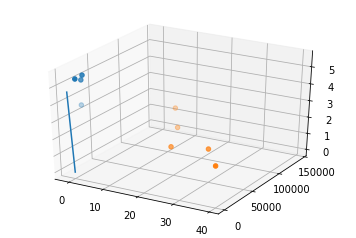

In [24]:
fig=plt.figure()
ax=plt.axes(projection="3d")
cl1=cluster1[["distance"]+["diameter"]+["density"]].values.T
cl2=cluster2[["distance"]+["diameter"]+["density"]].values.T
ax.set_xticks([0,10,20,30,40])
ax.set_yticks(np.arange(0,200000,50000))
ax.set_zticks(np.arange(0,6,1))
ax.scatter(cl1[0],cl1[1],cl1[2],'o')
ax.scatter(cl2[0],cl2[1],cl2[2],'o')
ax.plot([0,vec[0]*2],[0,vec[1]*2],[0,vec[2]*2])
plt.show()

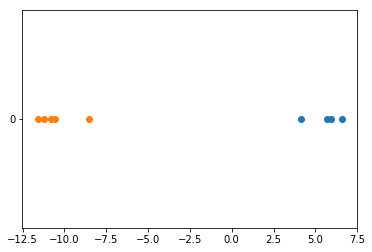

In [25]:
fig=plt.figure()
ax=plt.axes()
ax.set_yticks([-1,0,1])
ax.scatter(proj_1,np.zeros(proj_1.shape))
ax.scatter(proj_2,np.zeros(proj_2.shape))

In [28]:
norm_vector

matrix([[-3.35075148e-01, -7.37587984e-05,  1.30166407e+00]])